In [2]:
import tensorflow as tf
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)

2.10.0


In [3]:
data = pd.read_csv('data/webdev-licenses.csv')
data

,id,productid,serialnumber,authenticationcode,expirationdate,featuretype,licensekey,ismaintenancedisabled,maintenanceexpirationdate,newserial,...,company,customer,reseller,activationcount,saledate,isaccessunlimited,maxdaysbetweenconfirmations,datecreated,lastupdateddate,versionstamp
0,62d2c968-8be9-4dea-9de5-a70f002c6e63,86d87623-7df9-4589-8cbe-a70f002c6b8a,Z90000000,84F8809EB9367A8E9A2796A4F1AF51DB,NaN,4398046511104,NaN,f,2018-02-02 00:00:00,NaN,...,Remark Licensing API,[Online] Test Simple Activation,NaN,1,2017-02-03 02:41:43,f,7,2017-02-03 02:41:46,2017-02-03 02:41:46,1
1,be1475ee-5208-4ea7-8044-a70f002c6e65,86d87623-7df9-4589-8cbe-a70f002c6b8a,Z90000001,714E3FA925CE6D759CDF13185FEF5220,NaN,4398046511104,NaN,f,2018-02-02 00:00:00,NaN,...,Remark Licensing API,[Online] Test Software Deactivated,NaN,1,2017-02-03 02:41:43,f,7,2017-02-03 02:41:46,2017-02-03 02:41:46,1
2,a4a69869-77c2-470f-be5d-a70f002c6e65,86d87623-7df9-4589-8cbe-a70f002c6b8a,Z90000002,2BB5A9D9D8FD5B8B45D19CA255947F20,NaN,4398046511104,NaN,f,2018-02-02 00:00:00,NaN,...,Remark Licensing API,[Online] Test Fingerprint Changed,NaN,1,2017-02-03 02:41:43,f,7,2017-02-03 02:41:46,2017-02-03 02:41:46,1
3,d1a32d01-6ead-47d6-8d05-a70f002c6e65,86d87623-7df9-4589-8cbe-a70f002c6b8a,Z90000003,D58C3DD1FCC16D175E3C63EA1EBA27CE,2017-02-01 00:00:00,4398046511104,NaN,f,2018-02-02 00:00:00,NaN,...,Remark Licensing API,[Online] Test License Expired,NaN,1,2017-02-03 02:41:43,f,7,2017-02-03 02:41:46,2017-02-03 02:41:46,1
4,beaec864-58c5-4ef1-87fc-a70f002c6e66,86d87623-7df9-4589-8cbe-a70f002c6b8a,Z90000007,9608E59D03EDF97775428C22BB40FD40,NaN,4398046511104,NaN,f,2018-02-02 00:00:00,NaN,...,Remark Licensing API,[Online] Thai System Time,NaN,1,2017-02-03 02:41:43,f,7,2017-02-03 02:41:46,2017-02-03 02:41:46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6263,0faabf35-6fe7-439f-adf6-5a8c9aca5f3b,e3ccd261-7c44-4d5a-85fe-a57500cf69ca,C50000021,4FF5990CD8E475FB57F803762B756251,NaN,4398095597570,JHDD-B5EV-C914-MFVJ,f,NaN,NaN,...,Northeast State,Sherry Mott,NaN,1,2015-04-20 00:00:00,t,0,2015-12-21 00:00:00,2023-06-01 15:43:10,6
6264,431d7db9-d6c0-4be7-b34d-1fe395f6daac,e3ccd261-7c44-4d5a-85fe-a57500cf69ca,C50000005,4B40BCDA054D907656189B15897985A1,NaN,4398095597570,FMV8-N0HT-6U25-TH3E,f,2023-11-30 00:00:00,NaN,...,American Institute for CPCU,Diana Bove,NaN,1,2015-02-24 05:00:00,f,0,2015-12-21 00:00:00,2023-06-01 15:09:44,12
6265,0ff02e21-6f0c-4eb0-9292-9fba61a00337,e3ccd261-7c44-4d5a-85fe-a57500cf69ca,C50000020,08FC51B5CB6A37FAB620EE915D573DE6,NaN,4398095597570,JGU5-KMFT-29F5-LEQJ,f,NaN,NaN,...,Portland State University,Alan Dubinsky,NaN,1,2015-04-16 00:00:00,t,0,2015-12-21 00:00:00,2023-06-01 15:43:16,17
6266,9c3a4706-a6cb-4c0f-9cf3-a38600cb9f2e,de76fe0c-f6df-42e0-8fdc-a37000b6c6e3,R30011247,DF7559B4FAE1AFE67B98DA56E092F326,NaN,4398096859266,7T6J-R8C9-WK6R-036T,f,2016-02-27 00:00:00,NaN,...,R.A. Malatest & Associates Ltd,Robert Malatest,NaN,1,2015-02-26 20:25:11,f,0,2014-08-13 16:21:21,2023-06-01 19:02:11,5


In [4]:
time.mktime(datetime.datetime.strptime(data['saledate'][0], '%Y-%m-%d %H:%M:%S')\
    .timetuple())



1486107703.0

In [5]:
def saledate_to_timestamp(saledate):
    if not isinstance(saledate, str): return saledate
    
    return datetime.date.fromisoformat(saledate[:10])

data['saledate'] = data['saledate'].apply(saledate_to_timestamp)

In [6]:
office_guids = [
    "f488ef9b-b814-4f9b-abb4-a49800c75819",
    "de76fe0c-f6df-42e0-8fdc-a37000b6c6e3",
    "d1d14ba1-ef6c-47ce-9bd2-a44200d6498b",
    "3d9d15e0-a4c6-4de5-ad88-a62000ceeccd",
    "c0d10801-0abb-45b4-9820-a41701262ef0",
    "182db722-90e1-465b-a278-a5da00a51cfa",
    "1fe090bc-0e4f-418d-9dbd-a62000ce8992"
]

data_office = data.loc[data['productid'].isin(office_guids)]

# drop 2023 outlier
data_office = data_office.loc[data_office['saledate'] <= datetime.date(2023,1,1)]
data_office['saledate'].array[0]

datetime.date(2017, 2, 17)

In [7]:
# add day of year column, then sin/cos signals
data_office['day_of_year'] = data_office['saledate'].apply(lambda x: x.timetuple().tm_yday)
data_office['year_sin'] = np.sin(data_office['day_of_year'].apply(lambda x: x * (2 * np.pi / 365)))
data_office['year_cos'] = np.cos(data_office['day_of_year'].apply(lambda x: x * (2 * np.pi / 365)))

data_office.columns

Index(['id', 'productid', 'serialnumber', 'authenticationcode',
       'expirationdate', 'featuretype', 'licensekey', 'ismaintenancedisabled',
       'maintenanceexpirationdate', 'newserial', 'newauthentication', 'type',
       'company', 'customer', 'reseller', 'activationcount', 'saledate',
       'isaccessunlimited', 'maxdaysbetweenconfirmations', 'datecreated',
       'lastupdateddate', 'versionstamp', 'day_of_year', 'year_sin',
       'year_cos'],
      dtype='object')

In [8]:
sale_counts = data_office.groupby(data['saledate'])['activationcount'].count()
sale_counts

saledate
2014-05-21     1
2014-05-22     1
2014-05-23     2
2014-05-27     1
2014-05-28     9
              ..
2017-01-18    72
2017-01-19     1
2017-01-20     9
2017-01-23    25
2017-02-17     2
Name: activationcount, Length: 665, dtype: int64

In [9]:
# Add zeros in data

add_day = datetime.timedelta(days=1)

current_date = sale_counts.index.min()
max_date = sale_counts.index.max()

while current_date < max_date:
    print(current_date)
    if current_date not in sale_counts.index:
        sale_counts = pd.concat([sale_counts, pd.Series([0],index=[current_date])])
    current_date += add_day
    
sale_counts = sale_counts.sort_index()

2014-05-21
2014-05-22
2014-05-23
2014-05-24
2014-05-25
2014-05-26
2014-05-27
2014-05-28
2014-05-29
2014-05-30
2014-05-31
2014-06-01
2014-06-02
2014-06-03
2014-06-04
2014-06-05
2014-06-06
2014-06-07
2014-06-08
2014-06-09
2014-06-10
2014-06-11
2014-06-12
2014-06-13
2014-06-14
2014-06-15
2014-06-16
2014-06-17
2014-06-18
2014-06-19
2014-06-20
2014-06-21
2014-06-22
2014-06-23
2014-06-24
2014-06-25
2014-06-26
2014-06-27
2014-06-28
2014-06-29
2014-06-30
2014-07-01
2014-07-02
2014-07-03
2014-07-04
2014-07-05
2014-07-06
2014-07-07
2014-07-08
2014-07-09
2014-07-10
2014-07-11
2014-07-12
2014-07-13
2014-07-14
2014-07-15
2014-07-16
2014-07-17
2014-07-18
2014-07-19
2014-07-20
2014-07-21
2014-07-22
2014-07-23
2014-07-24
2014-07-25
2014-07-26
2014-07-27
2014-07-28
2014-07-29
2014-07-30
2014-07-31
2014-08-01
2014-08-02
2014-08-03
2014-08-04
2014-08-05
2014-08-06
2014-08-07
2014-08-08
2014-08-09
2014-08-10
2014-08-11
2014-08-12
2014-08-13
2014-08-14
2014-08-15
2014-08-16
2014-08-17
2014-08-18
2014-08-19

In [10]:
sale_counts.array.min()

0

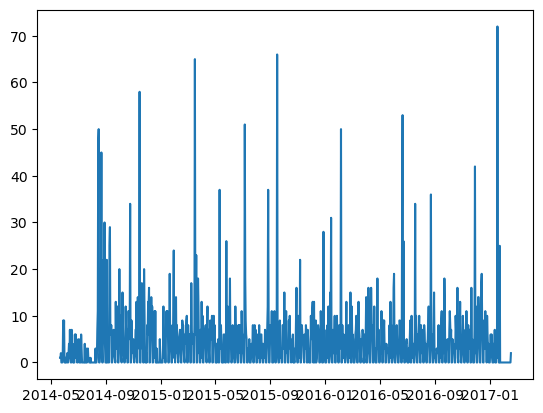

In [11]:
x = sale_counts.index
y = sale_counts.array

sale_counts.max()

plt.plot(x,y)

Text(0.5, 1.0, 'FFT of sales')

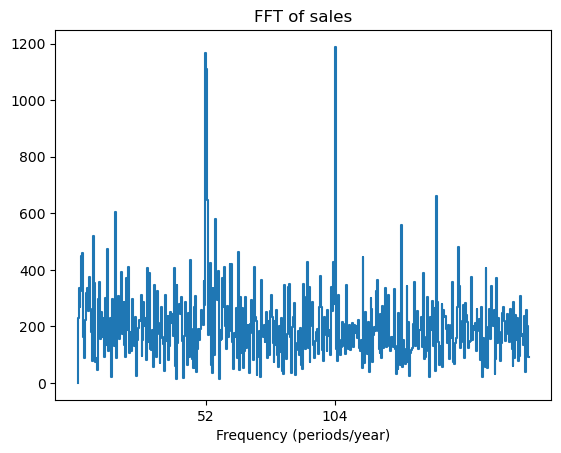

In [49]:
# mean center
sale_counts_centered = sale_counts - sale_counts.mean()

fft = np.abs(np.fft.rfft(sale_counts_centered.array))

f_per_dataset = np.arange(0,len(fft))
n_samples_d = len(sale_counts_centered)
days_per_year = 365
years_per_dataset = n_samples_d / days_per_year

f_per_year = f_per_dataset / years_per_dataset

plt.step(f_per_year, fft)
plt.xticks([52,104])
plt.xlabel('Frequency (periods/year)')
plt.title('FFT of sales')

287